In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from IPython.display import Image

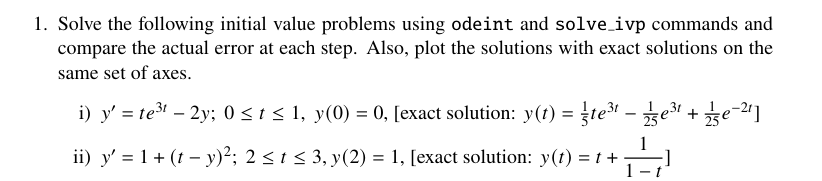

In [2]:
Image(filename='Screenshot 2025-03-01 194233.png')

In [3]:
def dvdt(t,y):
    return t*np.exp(3*t) - 2*y

def sol(t):
    return (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

def dvdt2(t,y):
    return 1 + (t-y)**2

def sol2(t):
    return t + 1/(1-t)

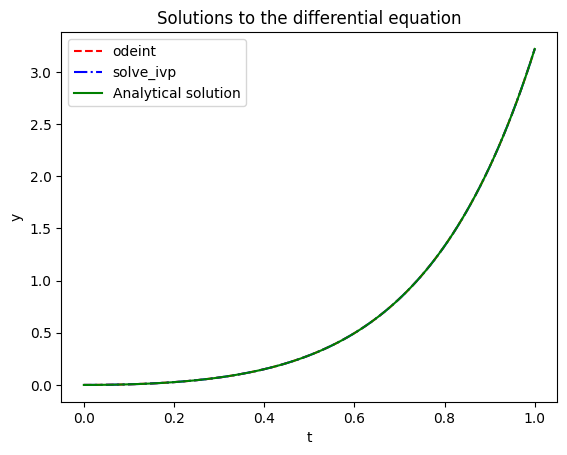

In [4]:
t = np.linspace(0,1,100)
method_1 = odeint(dvdt, y0=0, t=t, tfirst=True).flatten() #using odeint
method_2 = solve_ivp(dvdt, t_span=(0,1), y0=[0], t_eval=t).y.flatten() #using solve_ivp
plt.figure()
plt.plot(t, method_1, 'r--', label='odeint')
plt.plot(t, method_2, 'b-.', label='solve_ivp')
plt.plot(t, sol(t), 'g', label='Analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solutions to the differential equation')
plt.show()


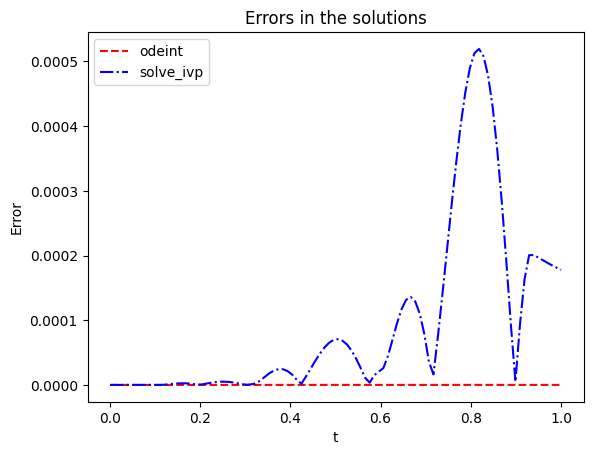

In [5]:
error1 = np.abs(method_1 - sol(t))
error2 = np.abs(method_2 - sol(t))
plt.figure()
plt.plot(t, error1, 'r--', label='odeint')
plt.plot(t, error2, 'b-.', label='solve_ivp')
plt.legend()    
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Errors in the solutions')
plt.show()

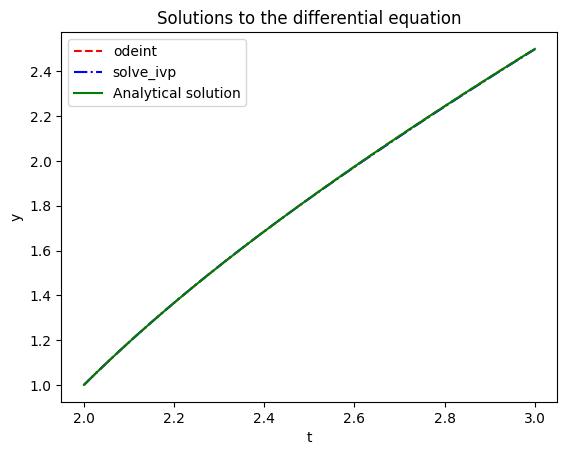

In [6]:
t = np.linspace(2,3,1000)
method_12 = odeint(dvdt2, y0=1, t=t, tfirst=True).flatten() #using odeint
method_22 = solve_ivp(dvdt2, t_span=(2,3), y0=[1], t_eval=t).y.flatten() #using solve_ivp
plt.figure()
plt.plot(t, method_12, 'r--', label='odeint')
plt.plot(t, method_22, 'b-.', label='solve_ivp')
plt.plot(t, sol2(t), 'g', label='Analytical solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solutions to the differential equation')
plt.show()

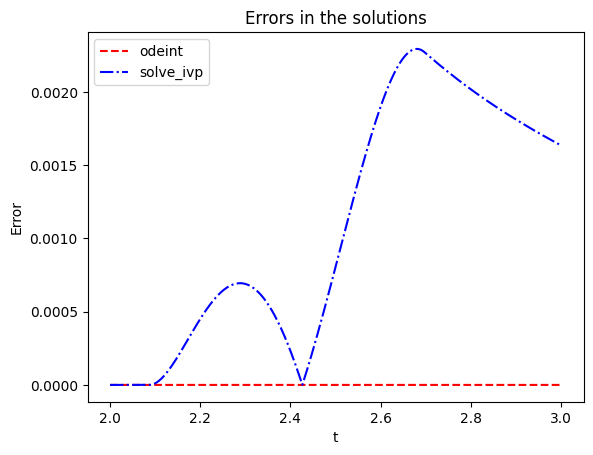

In [7]:
error1 = np.abs(method_12 - sol2(t))
error2 = np.abs(method_22 - sol2(t))
plt.figure()
plt.plot(t, error1, 'r--', label='odeint')
plt.plot(t, error2, 'b-.', label='solve_ivp')
plt.legend()    
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Errors in the solutions')
plt.show()

Error Table for y' = t e^(3t) - 2y, y(0) = 0 over [0, 1]
----------------------------------------------------------------------
t	 y_odeint	 y_solve_ivp	 y_exact	 error_odeint	 error_solve_ivp
----------------------------------------------------------------------
0.00	 0.000000	 0.000000	 0.000000	 0.000000	 0.000000
0.10	 0.005752	 0.005752	 0.005752	 0.000000	 -0.000000
0.20	 0.026813	 0.026813	 0.026813	 0.000000	 -0.000000
0.30	 0.071145	 0.071144	 0.071145	 0.000000	 -0.000000
0.40	 0.150778	 0.150796	 0.150778	 0.000000	 0.000018
0.50	 0.283617	 0.283546	 0.283617	 0.000000	 -0.000070
0.60	 0.496020	 0.496040	 0.496020	 0.000000	 0.000021
0.70	 0.826481	 0.826548	 0.826481	 0.000000	 0.000067
0.80	 1.330857	 1.330361	 1.330857	 0.000000	 -0.000496
0.90	 2.089774	 2.089789	 2.089774	 0.000000	 0.000014
1.00	 3.219099	 3.219277	 3.219099	 0.000000	 0.000178


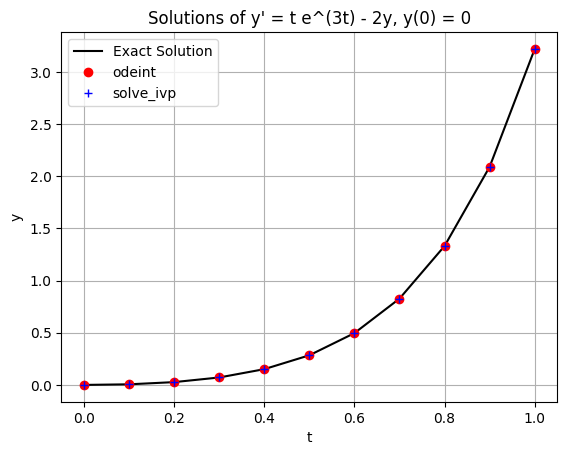

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

# Define the derivative function: y' = t e^(3t) - 2y
def f(t, y):
    return t * np.exp(3*t) - 2*y

# Define the exact solution: y(t) = (1/5) t e^(3t) - (1/25) e^(3t) + (1/25) e^(-2t)
def exact(t):
    return (1/5) * t * np.exp(3*t) - (1/25) * np.exp(3*t) + (1/25) * np.exp(-2*t)

# Define time points (11 points from 0 to 1 for simplicity and clear error table)
t = np.linspace(0, 1, 11)

# Compute the exact solution at time points
y_exact = exact(t)

# Initial condition
y0 = 0

# Solve using odeint
y_odeint = odeint(f, y0, t, tfirst=True).flatten()  # flatten since output is (11,1)

# Solve using solve_ivp with default RK45 method
sol = solve_ivp(f, [0, 1], [y0], t_eval=t)
y_solve_ivp = sol.y[0]  # extract solution array

# Calculate errors
error_odeint = y_odeint - y_exact
error_solve_ivp = y_solve_ivp - y_exact

# Print error table
print("Error Table for y' = t e^(3t) - 2y, y(0) = 0 over [0, 1]")
print("-" * 70)
print("t\t y_odeint\t y_solve_ivp\t y_exact\t error_odeint\t error_solve_ivp")
print("-" * 70)
for i in range(len(t)):
    print(f"{t[i]:.2f}\t {y_odeint[i]:.6f}\t {y_solve_ivp[i]:.6f}\t {y_exact[i]:.6f}\t "
          f"{error_odeint[i]:.6f}\t {error_solve_ivp[i]:.6f}")

# Plot the solutions
plt.plot(t, y_exact, 'k-', label='Exact Solution')
plt.plot(t, y_odeint, 'ro', label='odeint')
plt.plot(t, y_solve_ivp, 'b+', label='solve_ivp')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title("Solutions of y' = t e^(3t) - 2y, y(0) = 0")
plt.grid(True)
plt.show()

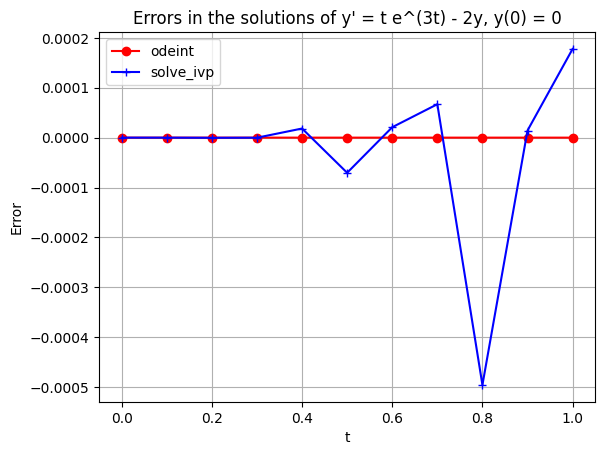

In [9]:
plt.plot(t, error_odeint, 'ro-', label='odeint')
plt.plot(t, error_solve_ivp, 'b+-', label='solve_ivp')
plt.legend()
plt.xlabel('t')
plt.ylabel('Error')
plt.title("Errors in the solutions of y' = t e^(3t) - 2y, y(0) = 0")
plt.grid(True)
plt.show()